In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
from pandas_profiling import ProfileReport# data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
passengers = pd.read_csv('/kaggle/input/test-file/tested.csv')

In [3]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
passengers.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [5]:
passengers[passengers['Survived']==1][0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [6]:
print((passengers['Survived']==1).sum())
print((passengers['Survived']==0).sum())

152
266


In [7]:
survived = passengers[passengers['Survived']==1]

In [8]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [9]:
perished = passengers[passengers['Survived']==0]

In [10]:
survived['Pclass'].value_counts()

3    72
1    50
2    30
Name: Pclass, dtype: int64

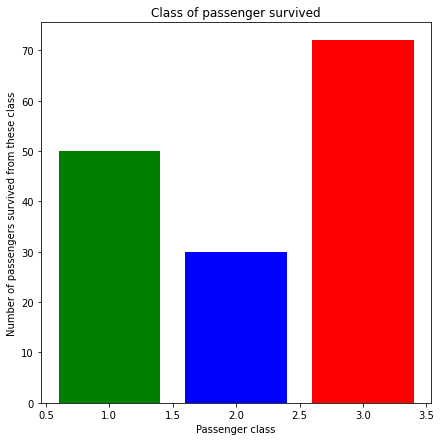

In [11]:
plt.figure(figsize=(7,7))
plt.xlabel("Passenger class")
plt.ylabel("Number of passengers survived from these class")
plt.title("Class of passenger survived")
plt.bar(survived['Pclass'].value_counts().keys(),survived['Pclass'].value_counts().values, color=['red','green','blue'])
plt.show()

In [12]:
 passengers['AgeGrp'] = pd.cut(passengers['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])

In [13]:
passengers['AgeGrp'].value_counts()

Youth             209
MiddleAged         68
Children           41
SeniorCitizens     14
Name: AgeGrp, dtype: int64

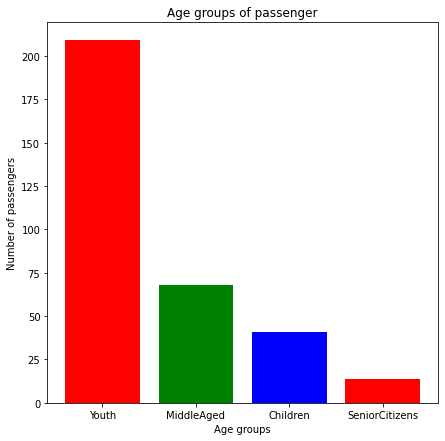

In [14]:
plt.figure(figsize=(7,7))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers")
plt.title("Age groups of passenger")
plt.bar(passengers['AgeGrp'].value_counts().keys(),passengers['AgeGrp'].value_counts().values, color=['red','green','blue'])
plt.show()

In [15]:
 survived['AgeGrp'] = pd.cut(survived['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


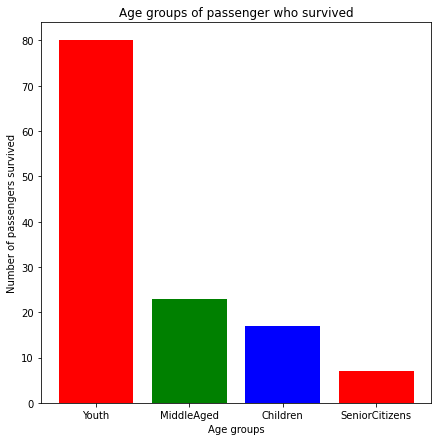

In [16]:
plt.figure(figsize=(7,7))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers survived")
plt.title("Age groups of passenger who survived")
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts().values, color=['red','green','blue'])
plt.show()

In [17]:
 perished['AgeGrp'] = pd.cut(perished['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


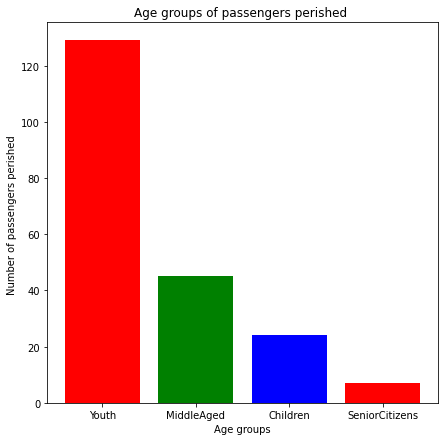

In [18]:
plt.figure(figsize=(7,7))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers perished ")
plt.title("Age groups of passengers perished ")
plt.bar(perished['AgeGrp'].value_counts().keys(),perished['AgeGrp'].value_counts().values, color=['red','green','blue'])
plt.show()

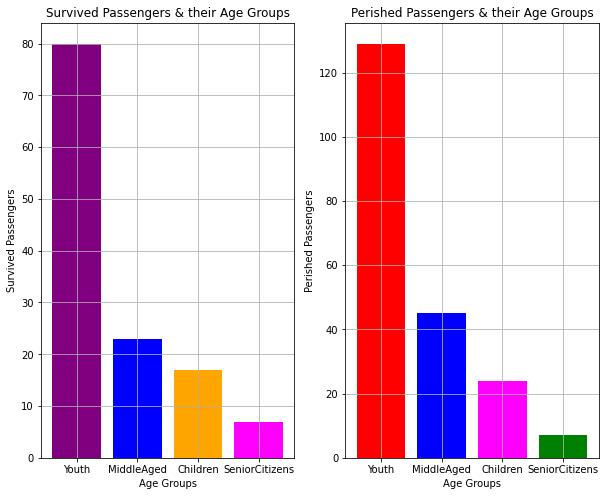

In [19]:
plt.figure(figsize=(10,8))


plt.subplot(1, 2, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.grid()
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(1, 2, 2)
plt.xlabel('Age Groups')
plt.ylabel('Perished Passengers')
plt.title('Perished Passengers & their Age Groups')
plt.grid()
plt.bar(perished ['AgeGrp'].value_counts().keys(),perished['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

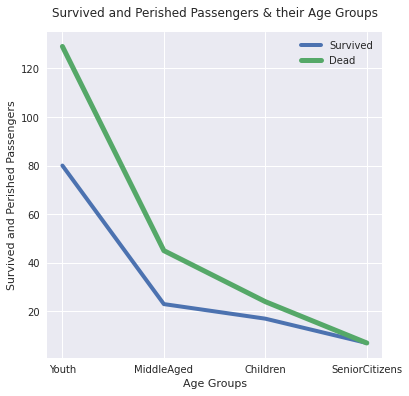

In [20]:
style.use("seaborn")
plt.figure(figsize=(6,6))
plt.plot(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(), label="Survived", linewidth=4)
plt.plot(perished['AgeGrp'].value_counts().keys(),perished['AgeGrp'].value_counts(), label="Dead", linewidth=5)

plt.xlabel('Age Groups')
plt.ylabel('Survived and Perished Passengers')
plt.title("Survived and Perished Passengers & their Age Groups",pad=15)
plt.legend()

In [21]:
passengers[['Name','Cabin']].head()

,Name,Cabin
0,"Kelly, Mr. James",NaN
1,"Wilkes, Mrs. James (Ellen Needs)",NaN
2,"Myles, Mr. Thomas Francis",NaN
3,"Wirz, Mr. Albert",NaN
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN


In [22]:
print(passengers['Cabin'].isnull().sum())
print(passengers['Cabin'].notnull().sum())

327
91


In [23]:
passengers['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

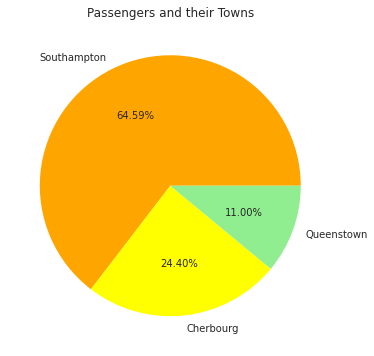

In [24]:
plt.figure(figsize=(6,6))
plt.title('Passengers and their Towns')
#shadow=True
plt.pie(passengers['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['orange','yellow','lightgreen'])
plt.show()

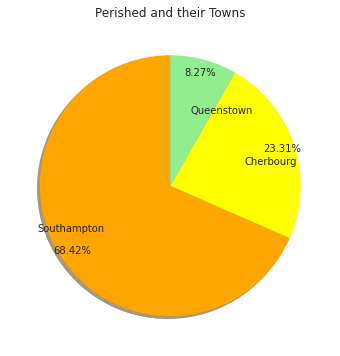

In [25]:
plt.figure(figsize=(6,6))
plt.title('Perished and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(perished['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['orange','yellow','lightgreen'],shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

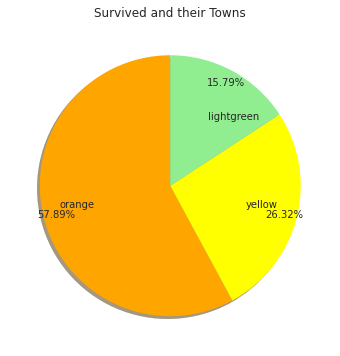

In [26]:
plt.figure(figsize=(6,6))
plt.title('Survived and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(survived['Embarked'].value_counts(),labels=['orange','yellow','lightgreen'], autopct ='%1.02f%%', colors=['orange','yellow','lightgreen'],shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

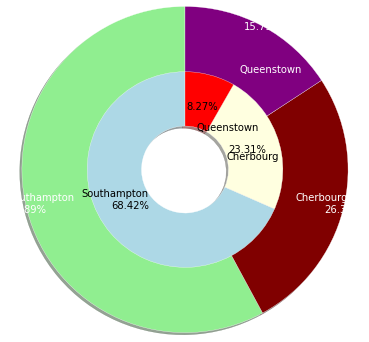

In [27]:
plt.figure(figsize=(5,5))

#plt.subplots(figsize=(10,6), facecolor='purple')


plt.pie(perished['Embarked'].value_counts(), 
       radius=1, 
       colors=['lightblue','lightyellow','red'], 
       labels=['Southampton','Cherbourg','Queenstown'], 
       textprops={'color':'black'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        autopct ='%1.02f%%',
       #pctdistance=1.1,
        labeldistance=0.4,
        shadow=True)
plt.pie(survived['Embarked'].value_counts(), 
       radius=1.5, 
       colors=['lightgreen','maroon','purple'],
        textprops={'color':'white'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        labels=['Southampton','Cherbourg','Queenstown'], 
        shadow=True, labeldistance=0.7,autopct ='%1.02f%%',pctdistance=1)
#plt.tight_layout()
plt.show()

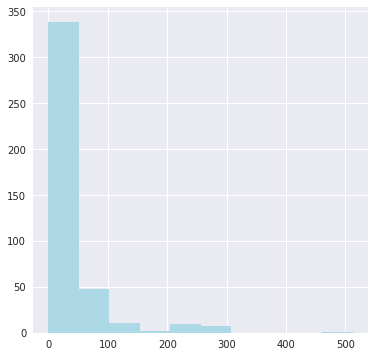

In [28]:
plt.figure(figsize=(6,6))
plt.hist(passengers['Fare'],color='lightblue',)
plt.show()